## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **ip** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 |  |
|  Q 4 |  |
|  Q 5 |  |
|**Section 2**| **ip** |
|  Q 1 |  |
|  Q 2 |  |
|  Q 3 |  |
|  Q 4 |  |
|  Q 5 |  |

# **SECTION 1**
# **Funnel Analysis**

**Q1** : Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fp = '/content/drive/My Drive/AssignmentData.xlsx' # file path of the stored dataset in google drive

In [4]:
import pandas as pd # using pandas dataframe for data analysis and manipulation

In [5]:
df = pd.read_excel(fp)

In [6]:
df.head() # check if the columns are correct

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [7]:
df.isnull().sum() # to check where null values are present

,0
Date,0
Quarter,0
Department,0
Targeted Productivity,0
Overtime,0
No. of Workers,0
Actual Productivity,29


As we can see the column Actual Productivity has 29 null values

In [8]:
df.isna().sum()

,0
Date,0
Quarter,0
Department,0
Targeted Productivity,0
Overtime,0
No. of Workers,0
Actual Productivity,29


In [9]:
df.shape[0] # to find the number of rows

1197

29/1197 = 0.02 since the number of values missing is less than 30% it is optimal just to drop them

In [10]:
df['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype=object)

There can only be 4 quarters so there is wrong information

In [11]:
for col in ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  if df[col].notna().all():
    df[col] = df[col].astype(int)
  # there are string values in columns which are supposed to have float values thus this is done to coerce the error and drop all string values

In [12]:
df = df[df['Quarter'] != 'Q5']
# there are values of q5 which should not be present thus removing all instances of q5 since there are only 4 quarters in a year

In [13]:
df.dropna()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720.0,56.0,0.800125
...,...,...,...,...,...,...,...
1191,2015-11-03 00:00:00,Q2,Sewing,0.65,6840.0,57.0,0.650596
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960.0,8.0,0.628333
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960.0,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800.0,15.0,0.505889


In [14]:
df['Department'].unique()

array(['Sewing', 'Finishing'], dtype=object)

No discrepancies in these entries

In [15]:
df.drop_duplicates()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920.0,56.0,NaN
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720.0,56.0,0.800125
...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960.0,8.0,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960.0,8.0,NaN
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960.0,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800.0,15.0,0.505889


In [16]:
for x in ['Actual Productivity', 'Targeted Productivity', 'Overtime', 'No. of Workers']:
  nan_count = df[x].isna().sum()
  print(nan_count)


29
1
1
1


In [17]:
df['Actual Productivity'] = pd.to_numeric(df['Actual Productivity'], errors='coerce')

In [18]:
df.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920.0,56.0,NaN


In [19]:
df.shape

(1153, 7)

In [20]:
df = df[df['Actual Productivity'].notna()]

In [21]:
for x in ['Actual Productivity', 'Targeted Productivity', 'Overtime', 'No. of Workers']:
  nan_count = df[x].isna().sum()
  print(nan_count)


0
1
1
1


In [22]:
df.shape

(1124, 7)

In [23]:
for x in ['Targeted Productivity', 'Overtime', 'No. of Workers']:
  df = df[df[x].notna()]


In [24]:
df.shape

(1121, 7)

In [25]:
df.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720.0,56.0,0.800125


In [26]:
df2 = df

In [27]:
df2.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960.0,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660.0,30.5,0.800570
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720.0,56.0,0.800125


Null values and Duplicate values have been dropped instead of being filled with the mean as the percentage of null values was 2% of the whole data which is quite low. At the end we are left with 1120 entries that have all values and no duplicates

**Q2** : Principal Component Analysis (PCA)

(i) Perform PCA on the following standardized features: Targeted Productivity, Overtime, No. of Workers, and Actual Productivity.

(ii) Determine the number of principal components that explain at least 90% of the variance in the data.

(iii) Visualize the explained variance by each principal component.

(iv) Provide an interpretation of the PCA results. How can these principal components be used to understand the productivity dynamics in the organization?

Expectation: You need to explain what insights you gained from the analysis. Write it after your work on this question, or provide a text file

In [28]:
# first standardizing the features using sci kit scaler
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
df_cpy = df.drop(['Department', 'Quarter', 'Date'], axis=1)

In [31]:
df_cpy.head()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,0.80,7080.0,59.0,0.940725
1,0.75,960.0,8.0,0.886500
2,0.80,3660.0,30.5,0.800570
3,0.80,3660.0,30.5,0.800570
5,0.80,6720.0,56.0,0.800125


In [32]:
df_cpy = scaler.fit_transform(df_cpy) #numpy array

In [33]:
df_cpy2 =  df.drop(['Department', 'Quarter', 'Date'], axis=1) # copy of the dataframe before transformation

In [34]:
df_cpy = pd.DataFrame(df_cpy, columns=df_cpy2.columns) # converting the numpy array back to a dataframe

In [35]:
covariance_mat = df_cpy.cov() # covariance matrix using the inbuilt function of the pandas library

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# using the covariance matrix to make a heat map to interpret

In [37]:
covariance_mat

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Targeted Productivity,1.000893,-0.095563,-0.090523,0.418424
Overtime,-0.095563,1.000893,0.723334,-0.039361
No. of Workers,-0.090523,0.723334,1.000893,-0.040931
Actual Productivity,0.418424,-0.039361,-0.040931,1.000893


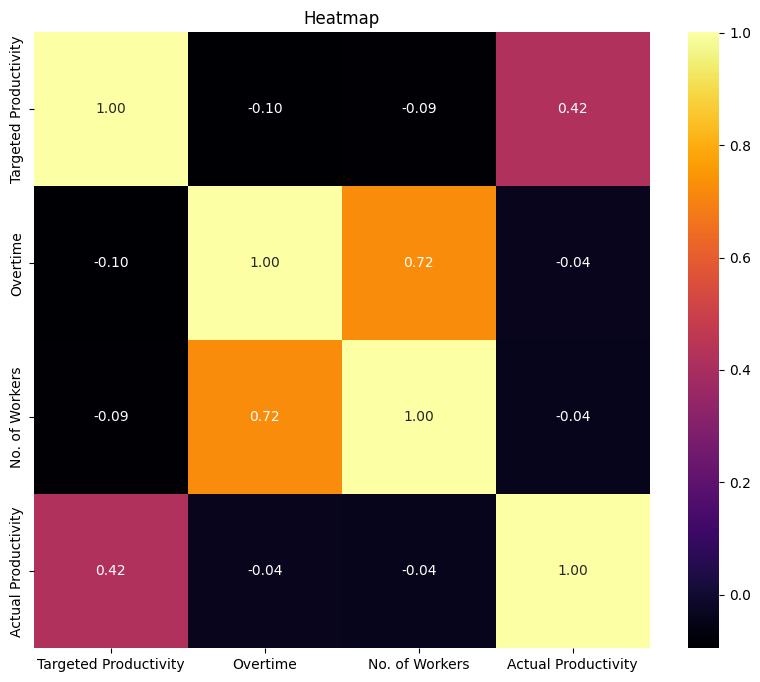

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_mat, annot=True, fmt=".2f", cmap='inferno', square=True)
plt.title('Heatmap')
plt.show()

We can see that targeted productivity and actual productivity have a medium correlation and Number of workers and overtime are strongly correlated

In [39]:
import numpy as np

In [40]:
# calculating the eiganvalues and vectors using the linalg functions of numpy
e_vals, e_vecs = np.linalg.eig(covariance_mat)

In [41]:
e_vals

array([1.77626787, 1.36976999, 0.58001348, 0.27752009])

In [42]:
e_vecs

array([[ 0.27631474, -0.64599139,  0.7115244 ,  0.00884973],
       [-0.66227097, -0.24548251,  0.02551551,  0.70744926],
       [-0.66156962, -0.24748778,  0.04101105, -0.70667781],
       [ 0.21765331, -0.67910475, -0.70099935, -0.00661039]])

In [43]:
sorted_index = np.argsort(e_vals)[::-1]

In [44]:
sorted_e_vals = e_vals[sorted_index]
sorted_e_vecs = e_vecs[:, sorted_index]
# sorting the values for the selection of features for PCA

In [45]:
exp_var = sorted_e_vals / sorted_e_vals.sum()
cumulative_var = np.cumsum(exp_var)
# for finding the components that explain the variance of 90%

In [46]:
k = next(i for i, cumulative_var in enumerate(cumulative_var) if cumulative_var >= 0.9) + 1
print (k)

3


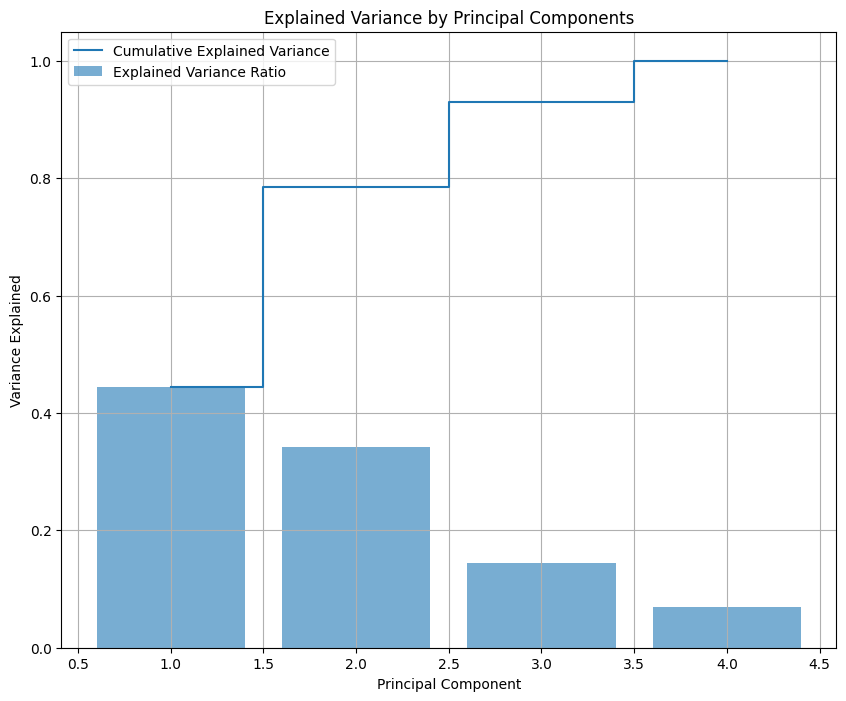

In [47]:
# thus 3 components can explain 90 % variance of the data
plt.figure(figsize=(10, 8))
# bar plot for the explained variance
plt.bar(range(1, len(exp_var) + 1), exp_var, alpha=0.6, label='Explained Variance Ratio')
# scatter plot for the cumulative variance ratio
plt.step(range(1, len(cumulative_var) + 1), cumulative_var, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# plotting


The first and second component contribute mostly for the PCA and the rest are less significant but 3rd component can be retained for more detail / resolution of data

In [48]:
standard_data = (df_cpy2 - df_cpy2.mean()) / df_cpy2.std()

In [49]:
PCA_data = standard_data.dot(sorted_e_vecs[:, :k])

In [50]:
PCA_data.head()

,0,1,2
0,-0.761663,-1.735121,-0.275412
1,1.758504,-0.177189,-0.559645
2,0.587528,-0.618480,0.211998
3,0.587528,-0.618480,0.211998
5,-0.777481,-1.125104,0.284248


Thus this is the transformed data which reduces the dimension from 4 to 3 and this is obtained through PCA. This PCA is done and shows that the first 3 components capture 90% of the variance of the dataset

In [51]:
data_pca = pd.DataFrame(sorted_e_vecs, columns=df_cpy2.columns)

In [52]:
data_pca.head()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,0.276315,-0.645991,0.711524,0.008850
1,-0.662271,-0.245483,0.025516,0.707449
2,-0.661570,-0.247488,0.041011,-0.706678
3,0.217653,-0.679105,-0.700999,-0.006610


Thereby from this we can conclude No. of Workers influences PC1 positively, and Overtime influences it negatively. This is because the first component captures the trade-off between workforce availability and the need for overtime.
A higher number of workers reduces the reliance on overtime, implying efficient resource allocation. Conversely, if overtime increases despite having enough workers, it could indicate inefficiencies in workforce management or unexpected demand spikes.
PC2 is strongly driven by Actual Productivity and negatively by Targeted Productivity. It is the component that seems to catch the link of how actual productivity approximates the target that an organization wants to get.
On the other hand, high positive impact derived from Actual Productivity means that the actual results are strong, while negative loading on Targeted Productivity implies there might be some deviation or disalignments from the set targets.
PC3 includes high negative loadings for Actual Productivity and Targeted Productivity; therefore, it is, in fact, the expression of the deviation of the latter from set productivity goals.
Potential negative impacts from actual and targeted productivity may be a warning sign of an issue in the larger system that is negatively affecting productivity—perhaps through poor planning, inadequate resources, or other outside causes—that is creating variances on a regular basis.
In the light of PC4, the number of workers and overtime assumes quite high importance in its loadings, both negative. This would then suggest that the component reflects problems related to manpower handling, in particular, when the allocation of workers does not fit productivity outcomes.
Any negative effect from either would suggest failings in the use of labor and overtime that could be indicative of an operational problem or bottleneck.


PC1 explains how an organization is effective in managing human resources towards the call of productivity. An organization observes that dimension to ensure that the labor in use is optimally utilized by the reduction of overtime hours needed, increasing the effectiveness of what is being produced.
PC2 will help measure the effectiveness of the concerned organization's target-reference mechanisms. It measures the realism in the targets for productivity set and actual productivity achieved against the set targets. Thus, the insights so derived can assist in refining the target-setting mechanism so that the goals are achievable and in harmony with the organizational capabilities.
PC3 focuses on specific positions where productivity is not in concert with the organization's goals. The factor can be useful in pointing out the root causes of such productivity deficiencies; if tackled properly, enabling the organization to realize more functionally consistent performance.
Attention is directed to PC4, and the organization will prioritize areas where the workforce management strategies have been ineffective. It can hence look at better ways of managing employees and overtime to avert such inefficiencies and enhance output.

**Q3** :Predictive Modeling and Time Series Analysis
For reference, read about Time Series Forecasting with ARIMA from Understanding Time Series Forecasting with ARIMA.

(i) Build an ARIMA model to forecast the Actual Productivity for the next four quarters (four weeks).

(ii) Evaluate the model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE).

(iii) Visualize the forecasted vs actual productivity values, and interpret the model’s accuracy.

Expectation: You are expected to create a clear and understandable chart that clearly shows the predicted productivity across the coming 4 quarters

In [53]:
import os
import warnings
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

# all the necessary imports and formatting as shown in the medium article link provided

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# for computing MSE and MAPE

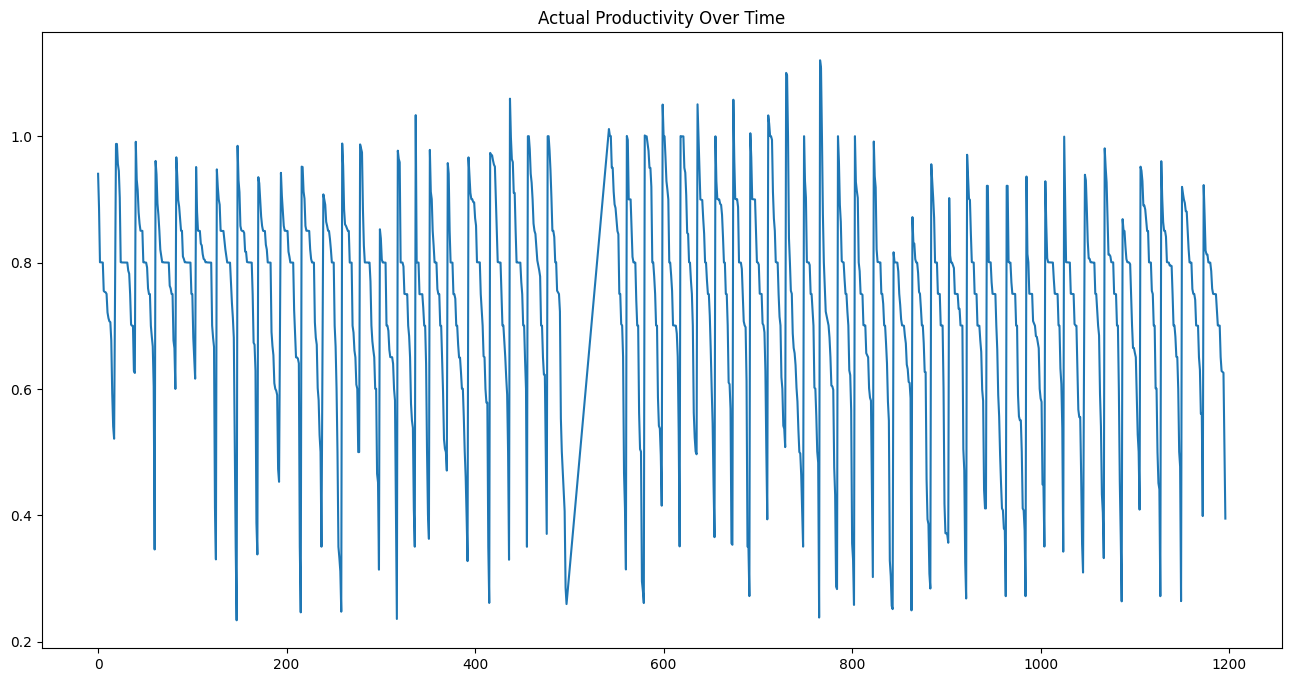

In [55]:
df['Actual Productivity'].plot(title='Actual Productivity Over Time', figsize=(16, 8))
plt.show()

This is actual productivity over the entries provided

In [56]:
productivity_per_qtr = df.groupby('Quarter')['Actual Productivity'].mean()
# seeing how productive the company was every quarter

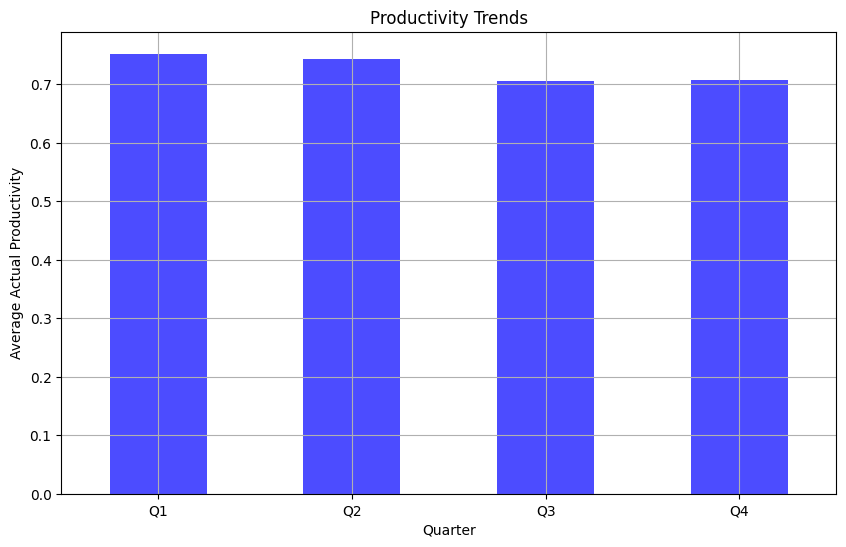

In [57]:
plt.figure(figsize=(10, 6))
productivity_per_qtr.plot(kind='bar', color='b', alpha=0.7)
plt.title('Productivity Trends')
plt.xlabel('Quarter')
plt.ylabel('Average Actual Productivity')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

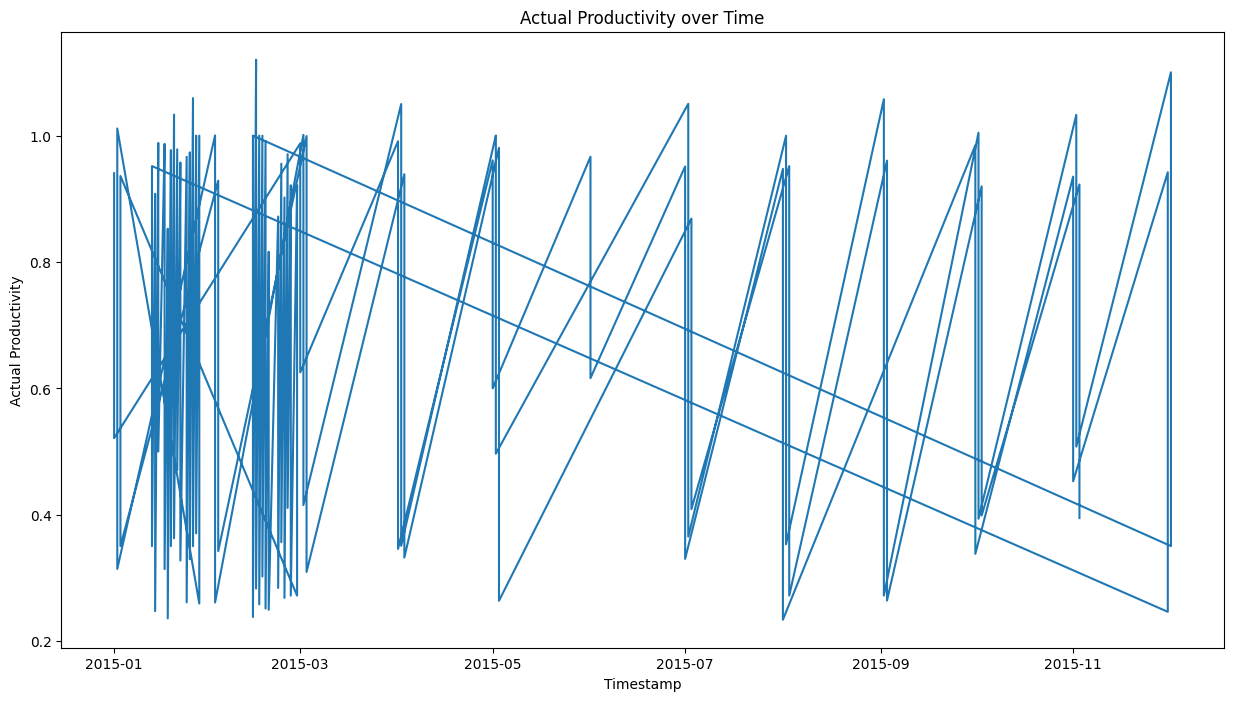

In [58]:
df_arima = df # new dataframe for this task alone since i am using the to_datetime function
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima.set_index('Date', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(df_arima.index, df_arima['Actual Productivity'])
plt.xlabel('Timestamp')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity over Time')
plt.show()

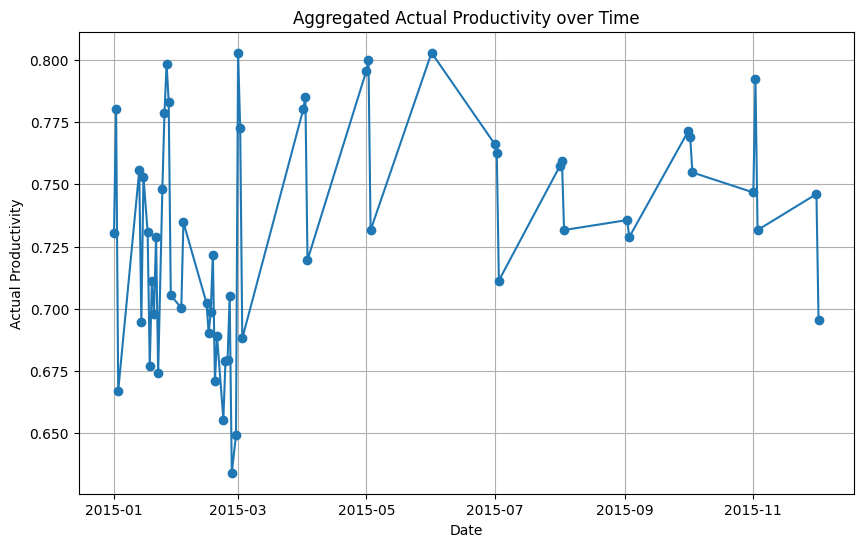

In [59]:
# since the plot is extremely hard to read i have used mean of each time period to give us an overall outlook of how the production could be at that point of time
df_agg = df_arima.groupby('Date')['Actual Productivity'].mean()
plt.figure(figsize=(10, 6))
plt.plot(df_agg.index, df_agg, marker='o', linestyle='-')
plt.title('Aggregated Actual Productivity over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.grid(True)
plt.show()

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [61]:
df = df2

In [62]:
df.head()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Date,,,,,,
2015-01-01,Q1,Sewing,0.80,"7,080.00",59.00,0.94
2015-01-01,Q1,Finishing,0.75,960.00,8.00,0.89
2015-01-01,Q1,Sewing,0.80,"3,660.00",30.50,0.80
2015-01-01,Q1,Sewing,0.80,"3,660.00",30.50,0.80
2015-01-01,Q1,Sewing,0.80,"6,720.00",56.00,0.80


In [63]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

adf_test(df['Actual Productivity'])


ADF Statistic: -3.983835823724584
p-value: 0.0014975572859508713
The series is stationary.


In [68]:
df2.head()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Date,,,,,,
2015-01-01,Q1,Sewing,0.80,"7,080.00",59.00,0.94
2015-01-01,Q1,Finishing,0.75,960.00,8.00,0.89
2015-01-01,Q1,Sewing,0.80,"3,660.00",30.50,0.80
2015-01-01,Q1,Sewing,0.80,"3,660.00",30.50,0.80
2015-01-01,Q1,Sewing,0.80,"6,720.00",56.00,0.80


In [64]:
df_ar = df

In [65]:
aggregated_data = df_ar.groupby(['Date']).agg({
    'Actual Productivity': 'sum'  # You could also sum, median, etc.
})

In [66]:
aggregated_data = aggregated_data.asfreq('Q')

In [67]:
df_ar['Date'] = pd.to_datetime(df_ar['Date'])  # Convert 'Date' column to datetime if it isn't already
df_ar.set_index('Date', inplace=True)

KeyError: 'Date'

In [ ]:
model = SARIMAX(aggregated_data['Actual Productivity'],
                order=(1, 1, 1),              # (p,d,q) order for ARIMA
                seasonal_order=(1, 1, 1, 4), # (P,D,Q,s) order for seasonal component
                enforce_stationarity=False,
                enforce_invertibility=False)

In [ ]:
model_fit = model.fit(disp=False)

In [ ]:
model_fit.summary()

In [ ]:
prediction = model_fit.get_forecast(steps=4)
prediction_ind = pd.date_range(start=df.index[-1], periods=4, freq='Q')

In [ ]:
predicted_values = prediction.predicted_mean

In [ ]:
intervals = prediction.conf_int()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Actual Productivity'], label='Observed')
plt.plot(prediction_ind, predicted_values, label='Prediction', color='red')
plt.fill_between(prediction_ind,
                 intervals.iloc[:, 0],
                 intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA (1,1,1)x(1,1,1,4) Prediction for Actual Productivity')
plt.legend()
plt.show()